## Importing libraries

In [563]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [564]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [565]:
df = pd.read_csv('Cars.csv')

In [566]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [567]:
# Check the shape of your data
df.shape

(8128, 13)

In [568]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [569]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [570]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [571]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [572]:
# rename columns
df.rename(columns = {'name':'brand'},  inplace = True)

In [573]:
# Notice that the column names changed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [574]:
df=df[df['owner']!='Test Drive Car']

In [575]:
owner_mapping ={'First Owner': 1,'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner'] = df['owner'].map(owner_mapping)
print(df.head(5))

                          brand  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [576]:
df['engine'].value_counts()

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2650 CC       1
2446 CC       1
3498 CC       1
2776 CC       1
1950 CC       1
Name: count, Length: 121, dtype: int64

In [577]:
df.shape

(8123, 13)

In [578]:
df = df[~df['fuel'].isin(["CNG","LPG"])]
df.fuel.value_counts()

fuel
Diesel    4401
Petrol    3627
Name: count, dtype: int64

In [579]:
df.shape

(8028, 13)

In [580]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage']=df['mileage'].astype(float)

df['engine'] = df['engine'].str.split().str.get(0)
df['engine']=df['engine'].astype(float)

df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power']=df['max_power'].astype(float)

df['brand'] = df['brand'].str.split().str.get(0)

df.drop(['torque'],axis=1,inplace=True)

df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [581]:
df.to_csv('Cleaned_data.csv')

In [582]:
# Create price_class by bucketing the selling_price into 4 categories
df['price_class'] = pd.cut(df['selling_price'], bins=4, labels=[0, 1, 2, 3])
df['price_class'] = df['price_class'].astype(int)

# Check class distribution
print("Class distribution:\n", df['price_class'].value_counts())


Class distribution:
 price_class
0    7732
1     182
2     113
3       1
Name: count, dtype: int64


## Feature Brand

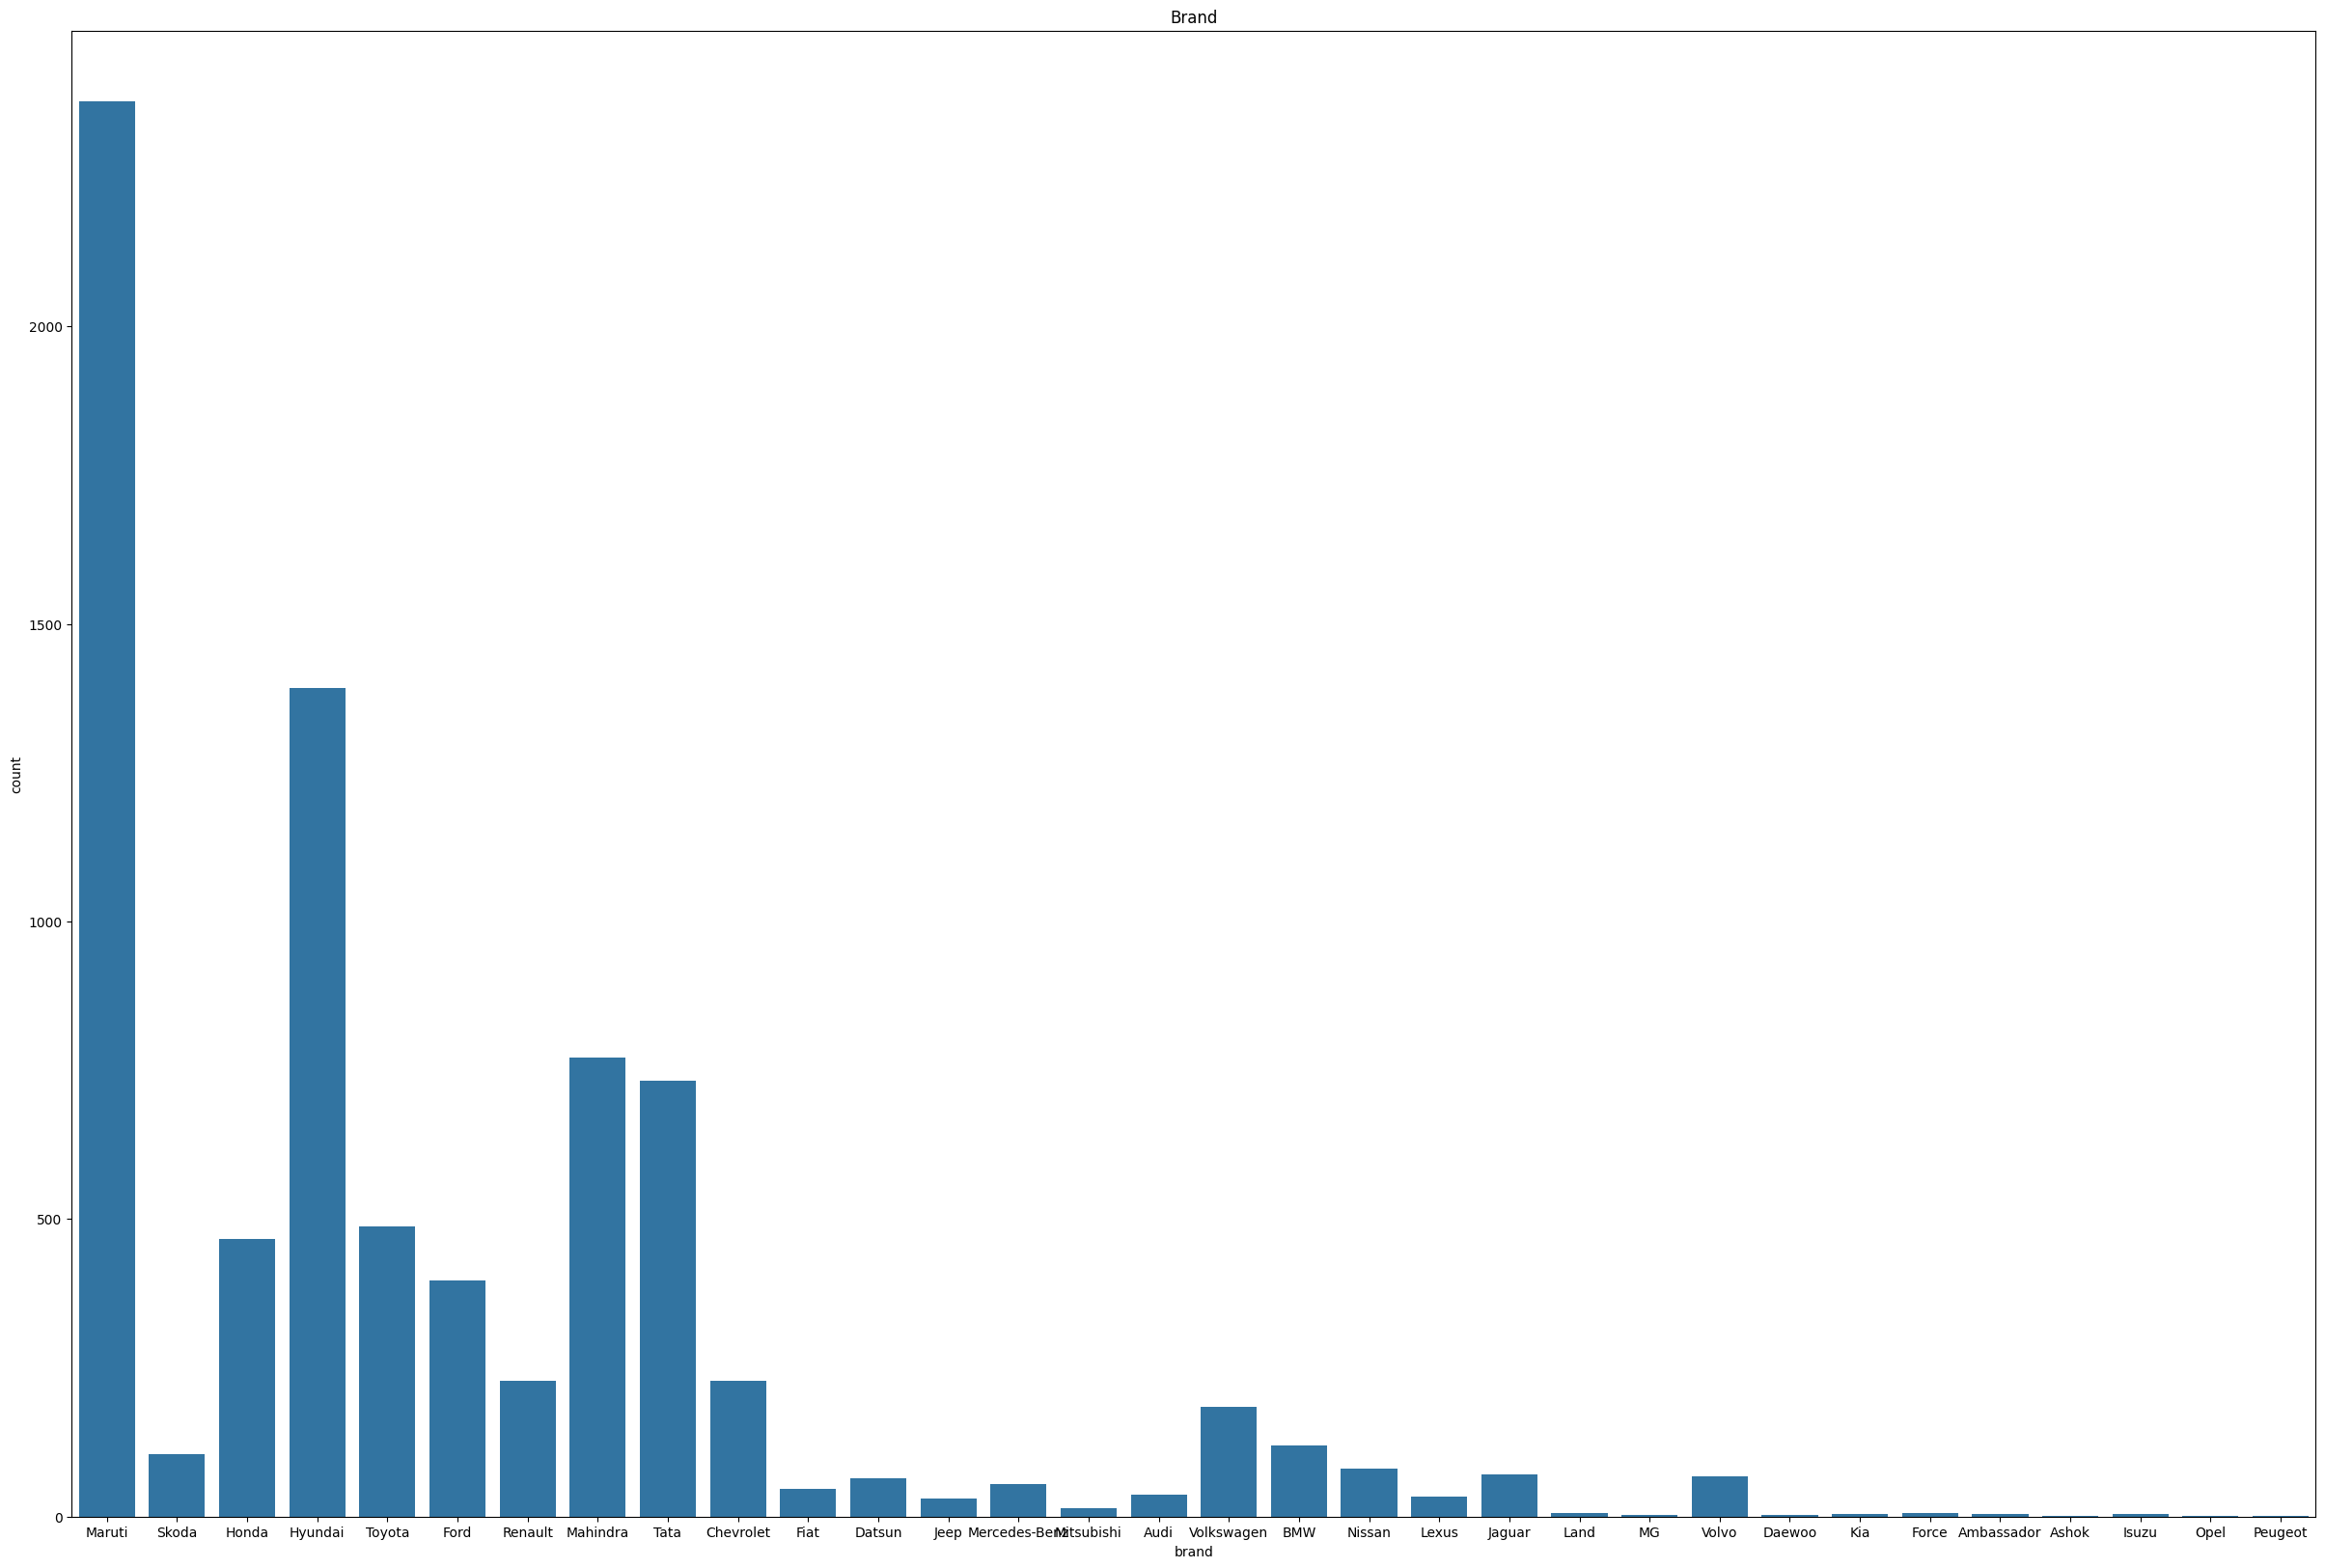

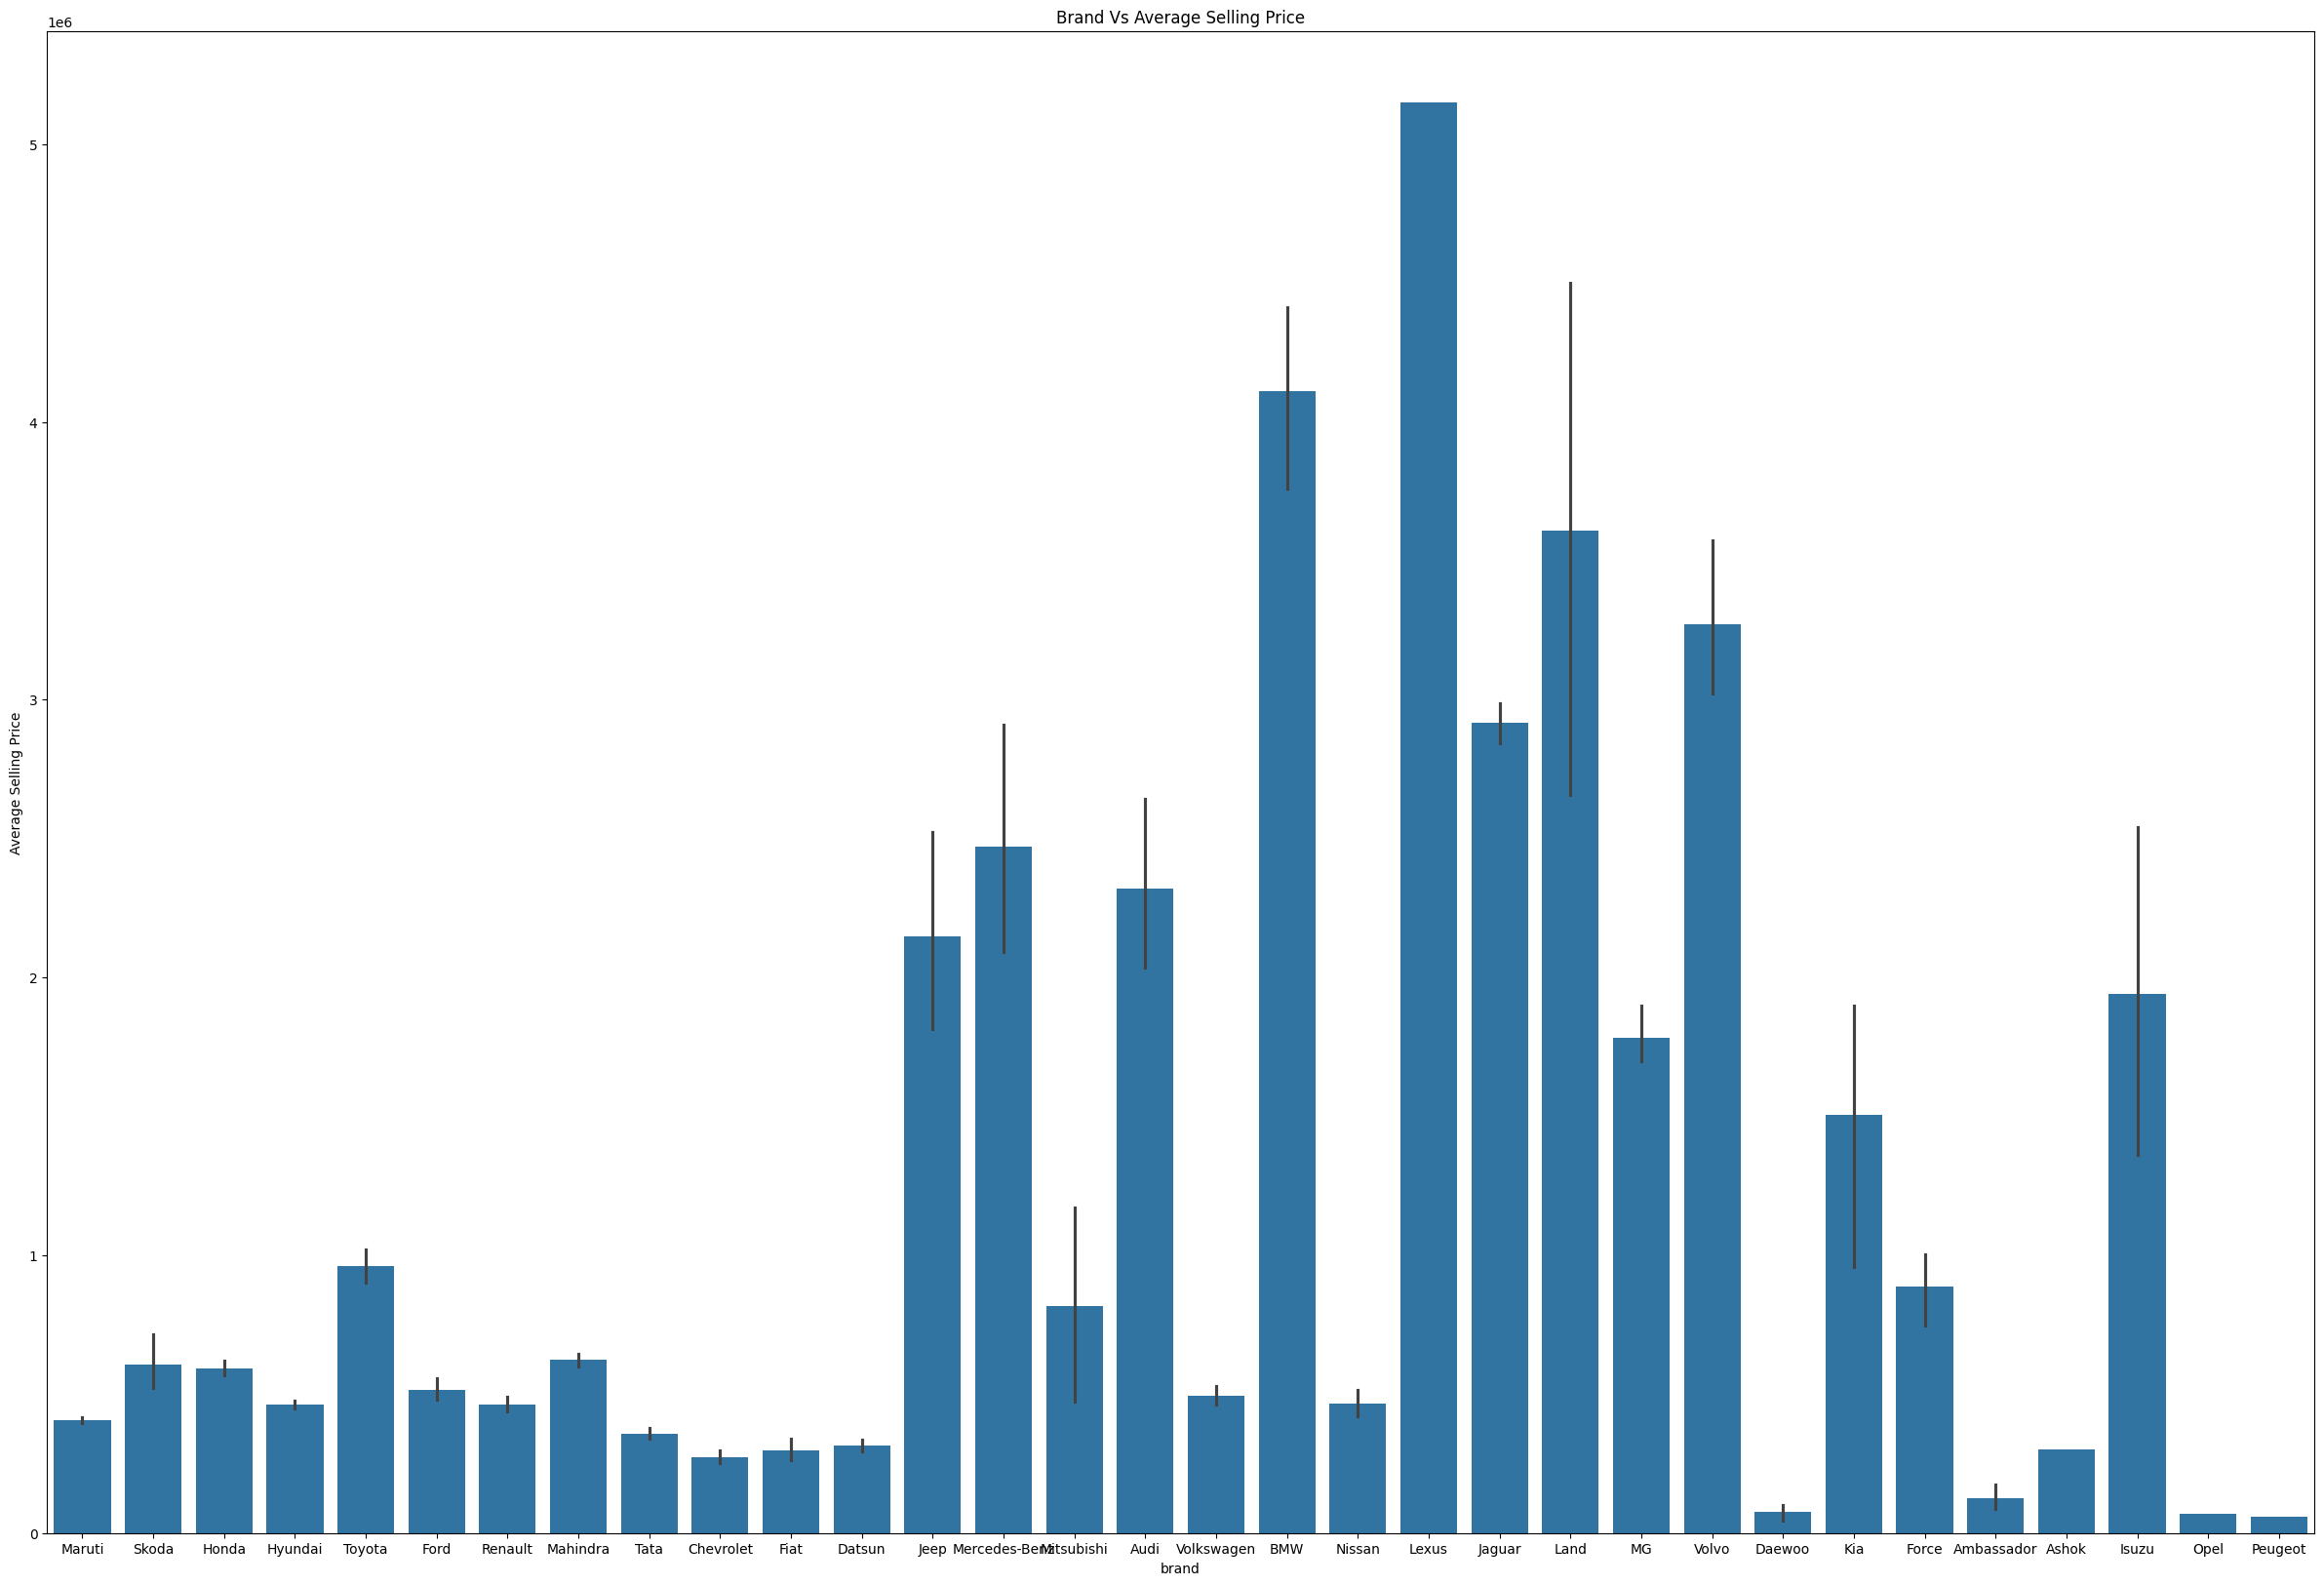

In [583]:
# Plotting the brand
plt.figure(figsize=(30,20))
plt.title('Brand')
sns.countplot(data = df, x='brand')
plt.show()

#Bar plot of brand vs average selling price
plt.figure(figsize=(30,20))
sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
plt.title('Brand Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Year

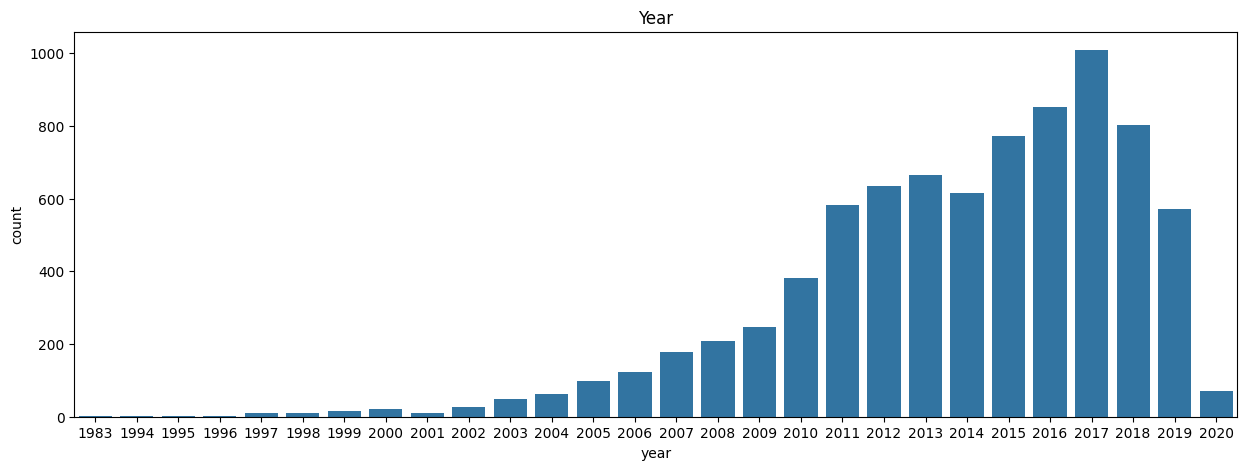

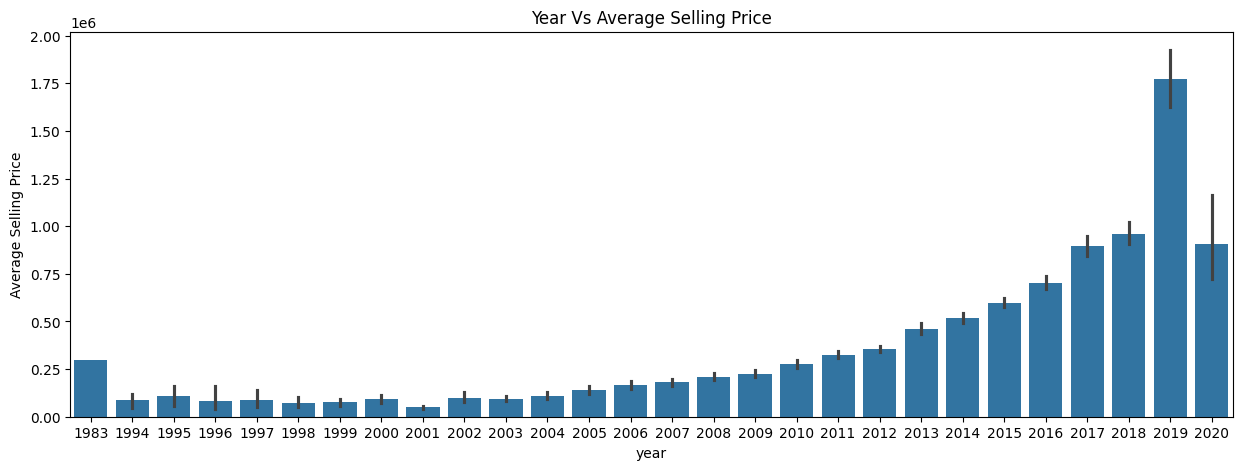

In [584]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Km Driven

Text(0.5, 1.0, 'km_driven Distribution')

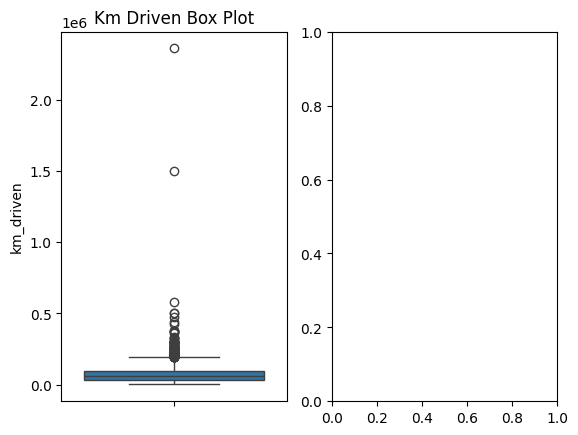

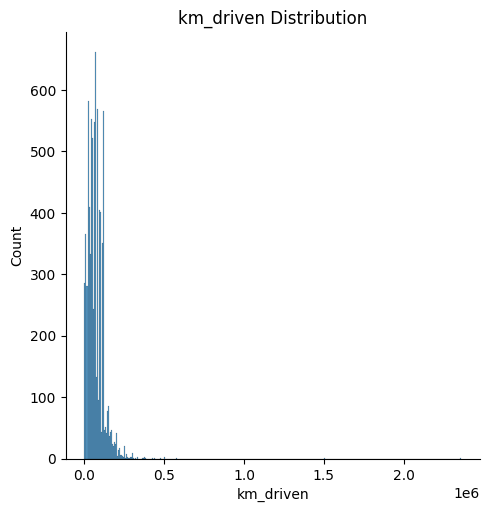

In [585]:
# Plotting the Km driven
plt.subplot(1,2,1)
sns.boxplot(df['km_driven'])
plt.title('Km Driven Box Plot')

plt.subplot(1,2,2)
sns.displot(df.km_driven)
plt.title('km_driven Distribution')

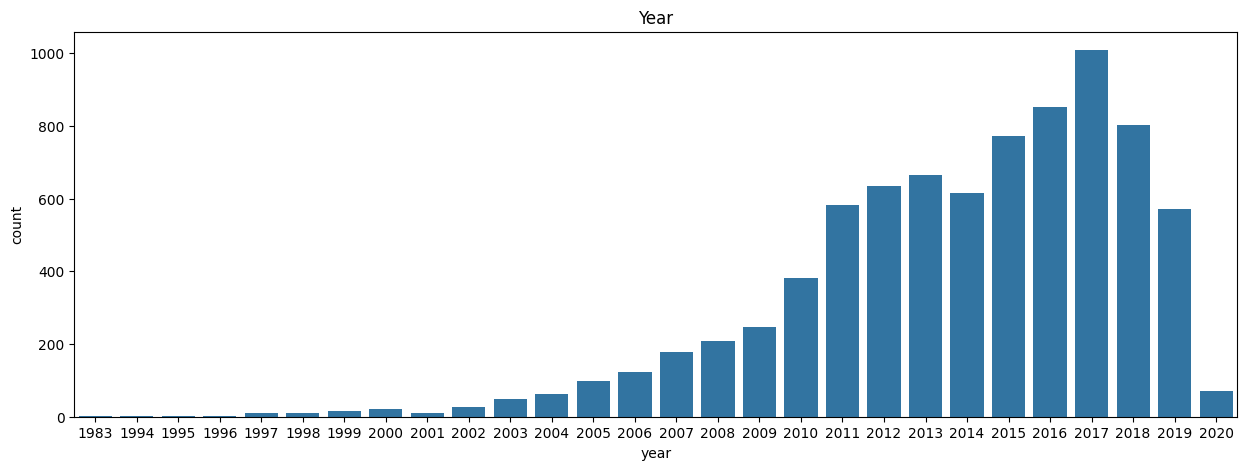

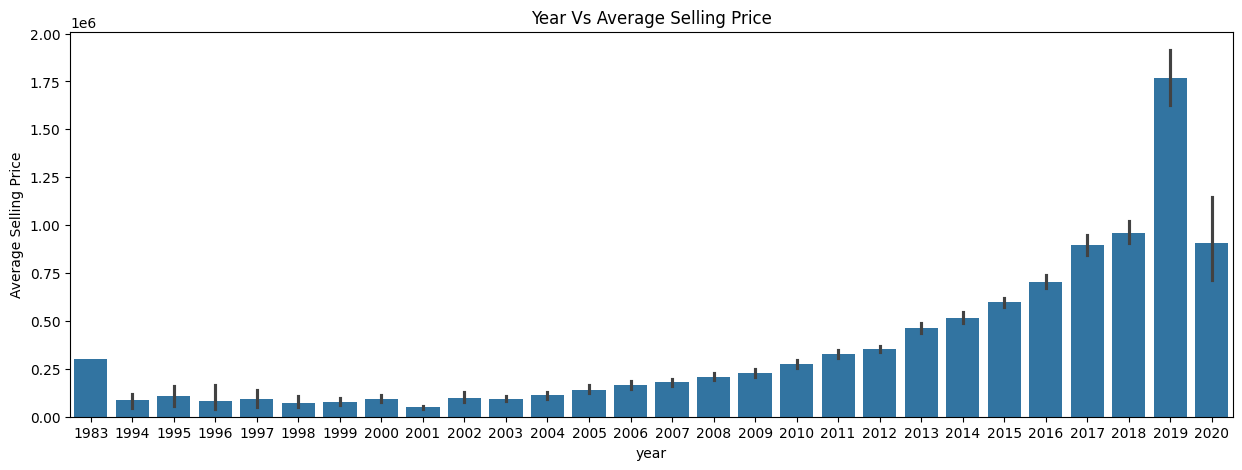

In [586]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

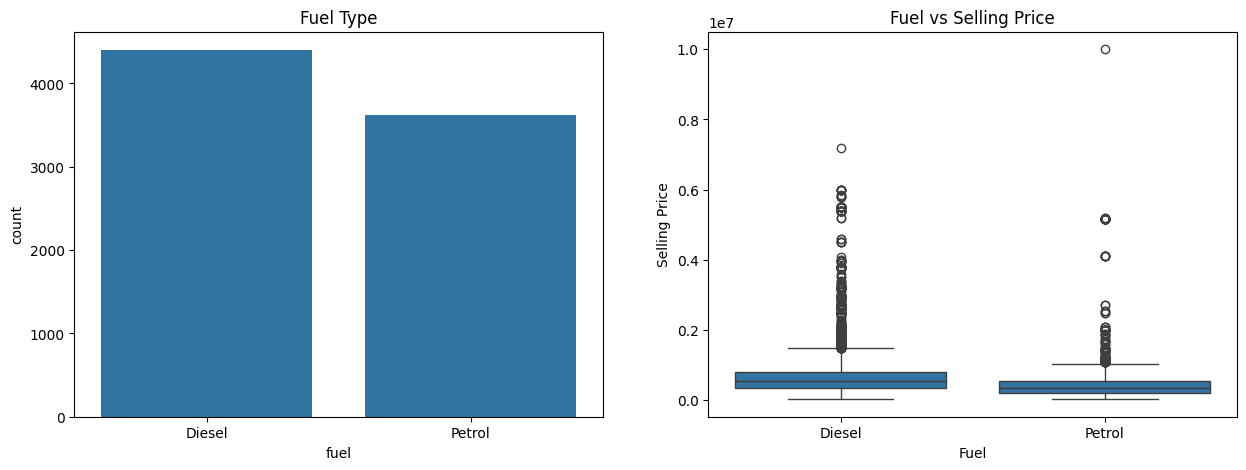

In [587]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'fuel')
plt.title('Fuel Type')

plt.subplot(1,2,2)
plt.title('Fuel vs Selling Price')
plt.xlabel('Fuel')
plt.ylabel('Selling Price')
sns.boxplot(data = df, x = 'fuel', y = 'selling_price')
plt.show()

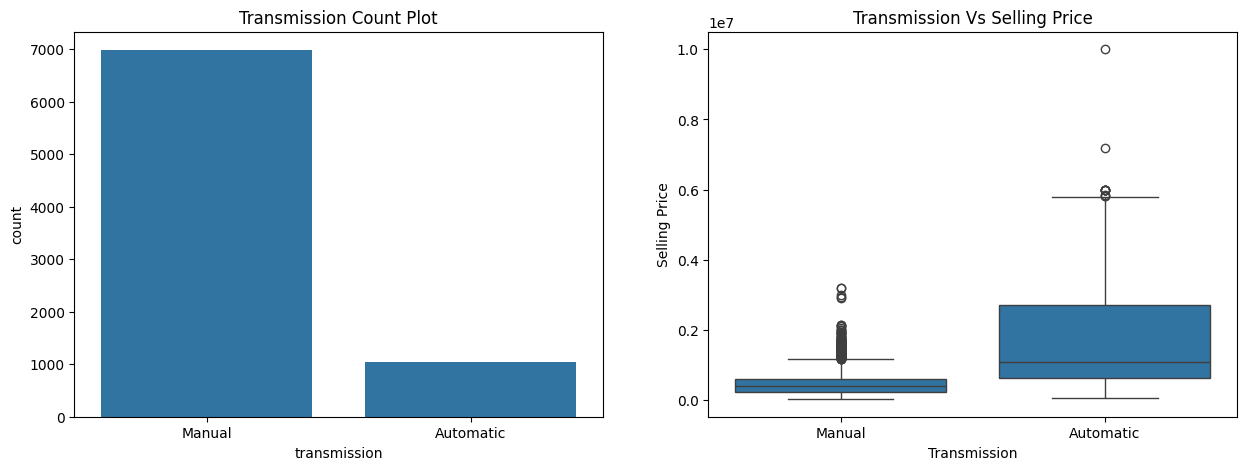

In [588]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Vs Selling Price')
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Transmission")
plt.show()

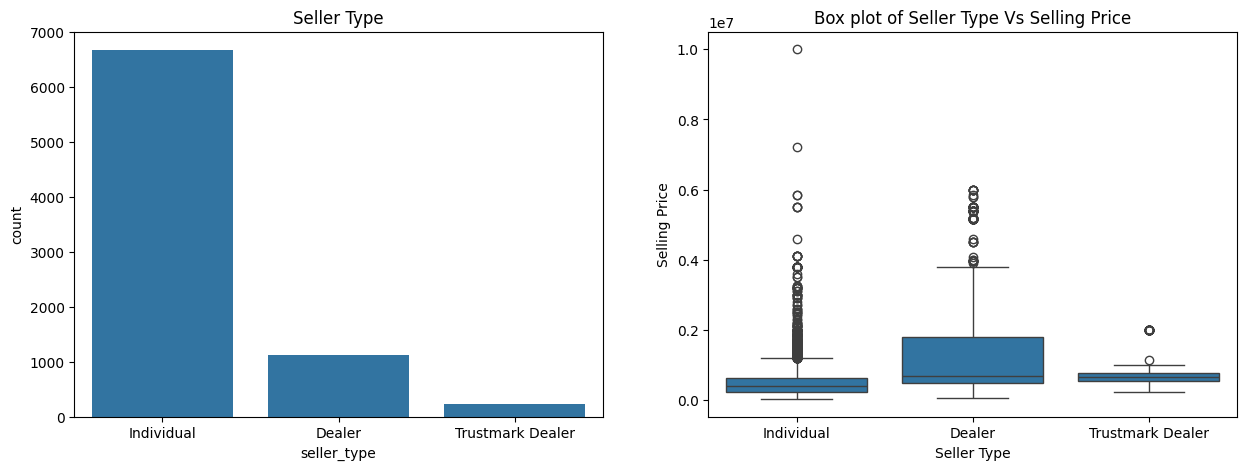

In [589]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'seller_type')
plt.title('Seller Type')

plt.subplot(1,2,2)
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.title('Box plot of Seller Type Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")
plt.show()

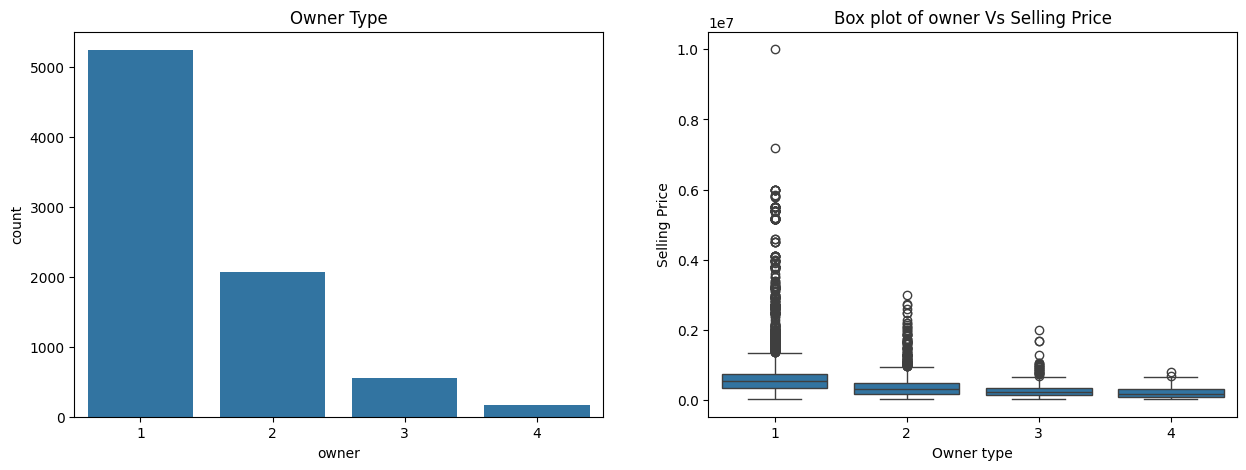

In [590]:
# Plotting the owner type
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='owner')
plt.title('Owner Type')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["owner"], y = df["selling_price"])
plt.title('Box plot of owner Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Owner type")
plt.show()

# {'First_owner': 1,'Second_owner': 2, 'Third_owner': 3, 'Fourth_and_above_owner': 4}

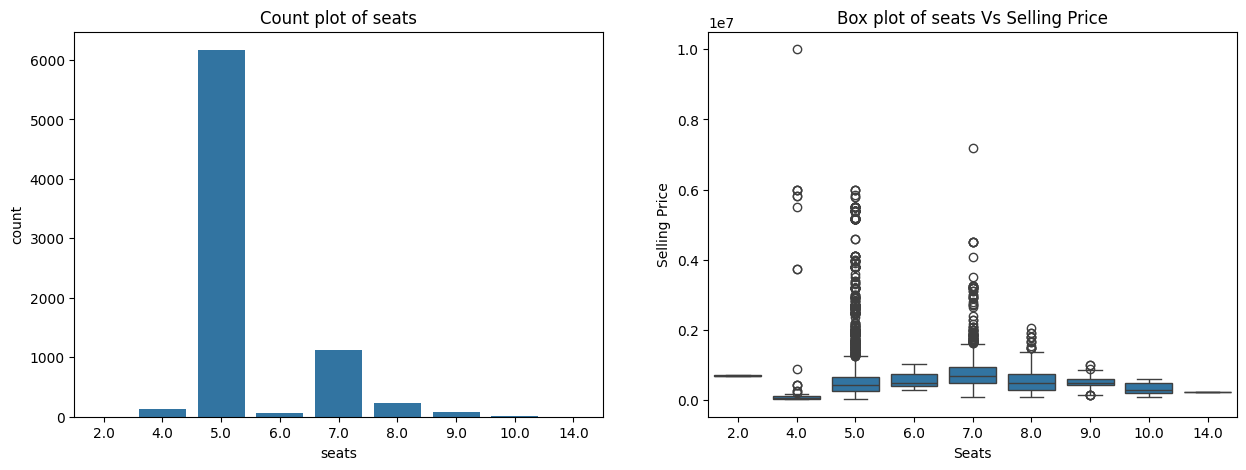

In [591]:
#Plotting the seats
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='seats')
plt.title('Count plot of seats')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["seats"], y = df["selling_price"])
plt.title('Box plot of seats Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seats")
plt.show()

#### Distribution plot

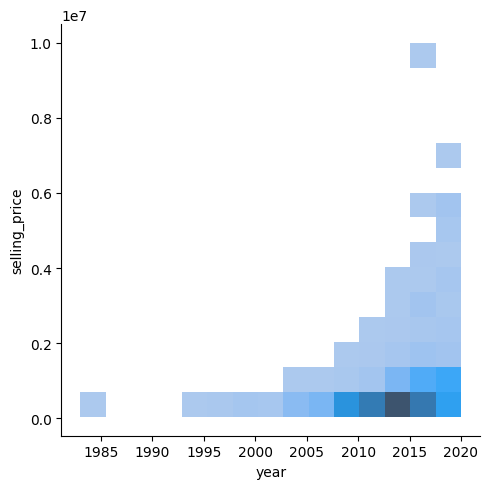

In [592]:
sns.displot(x='year', y='selling_price', data=df, bins=15)

<Axes: title={'center': 'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Count'>

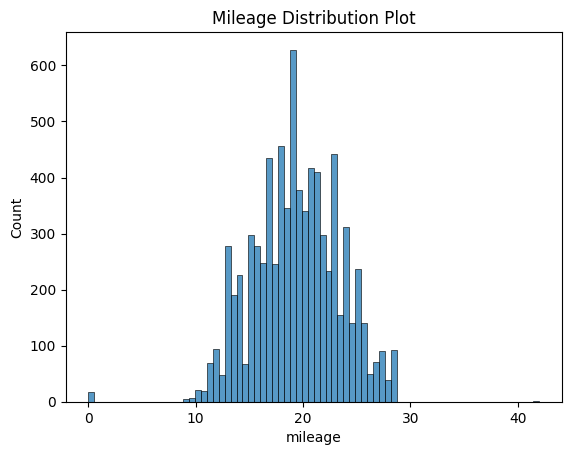

In [593]:
plt.title('Mileage Distribution Plot')
sns.histplot(df['mileage'])

<Axes: title={'center': 'Max power Dirstribution plot'}, xlabel='max_power', ylabel='Count'>

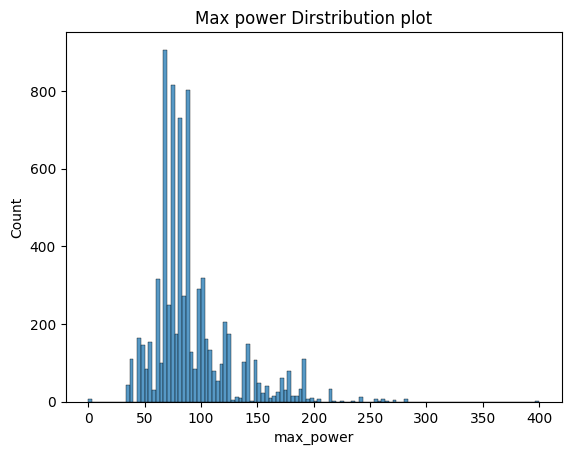

In [594]:
plt.title('Max power Dirstribution plot')
sns.histplot(df['max_power'])

<Axes: title={'center': 'engine Dirstribution plot'}, xlabel='engine', ylabel='Count'>

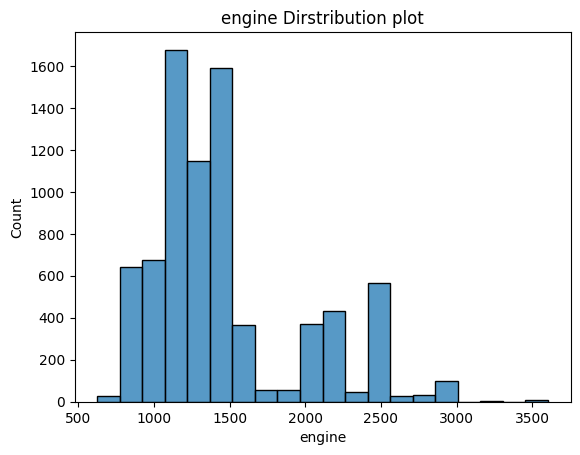

In [595]:
plt.title('engine Dirstribution plot')
sns.histplot(df['engine'],bins=20)

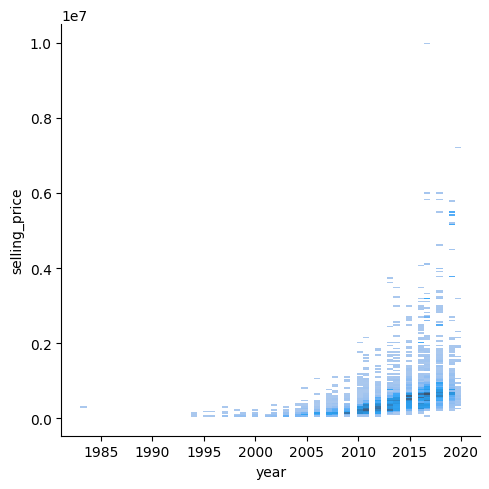

In [596]:
sns.displot(data = df, x = 'year', y='selling_price')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the car price.  It's also for checking whether certain features are too correlated.

<Axes: >

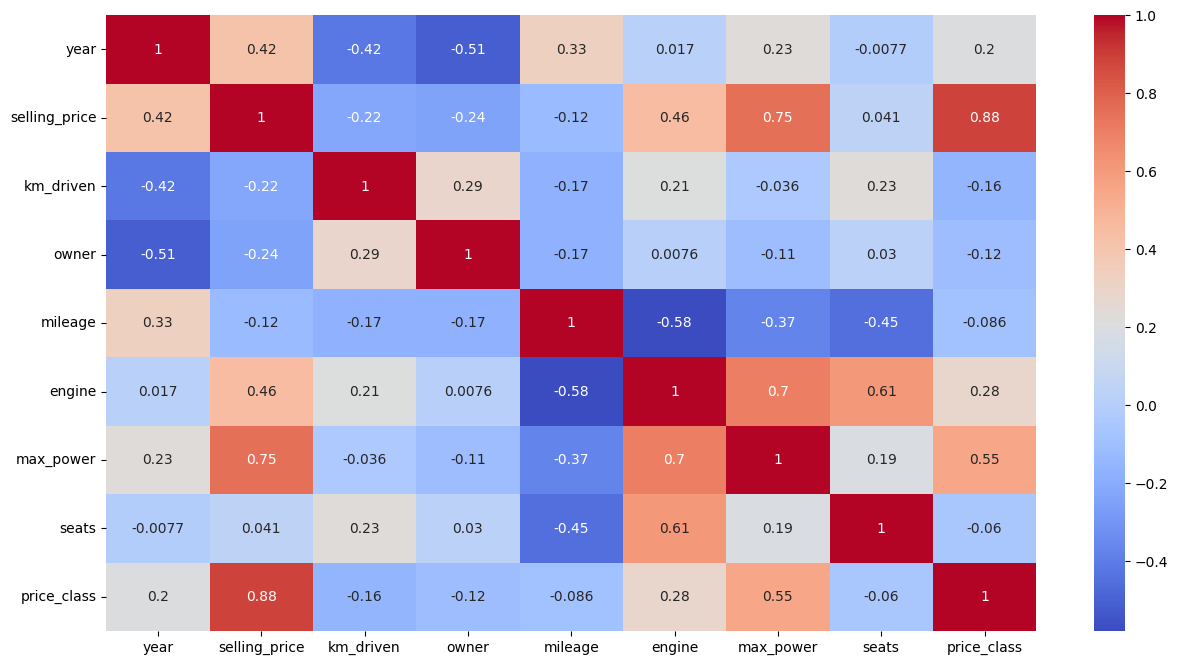

In [597]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding for fuel, transmission and seller_type



In [598]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [599]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [600]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique() 

array([1, 0])

In [601]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [602]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [603]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

## One hot encoding for brands

In [604]:
df['brand'].isna().sum()

np.int64(0)

In [605]:
df.reset_index(inplace=True)

In [606]:
from sklearn.preprocessing import OneHotEncoder
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
brand_array = brand_ohe.transform(df[['brand']]).toarray()

In [607]:
print(brand_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [608]:
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [609]:
brand_labels = brand_ohe.categories_[0]

In [610]:
print(brand_labels)

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [611]:
brand_df = pd.DataFrame(brand_array,columns=brand_labels[1:])

In [612]:
brand_df.head(5)

,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [613]:
df = pd.concat([df,brand_df], axis=1)

In [614]:
df.head(5)

,index,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,Maruti,2014,450000,145500,0,1,1,1,23.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Skoda,2014,370000,120000,0,1,1,2,21.14,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Honda,2006,158000,140000,1,1,1,3,17.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Hyundai,2010,225000,127000,0,1,1,1,23.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Maruti,2007,130000,120000,1,1,1,1,16.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [615]:
df.describe()

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,8028.000000,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,...,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000
mean,4062.523418,2013.815521,6.403937e+05,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,...,0.001744,0.010090,0.000125,0.000125,0.028401,0.013079,0.091305,0.060787,0.023044,0.008346
std,2350.205169,4.030836,8.027015e+05,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,...,0.041726,0.099946,0.011161,0.011161,0.166125,0.113621,0.288061,0.238955,0.150054,0.090979
min,0.000000,1983.000000,2.999900e+04,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.750000,2011.000000,2.600000e+05,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4065.500000,2015.000000,4.500000e+05,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6102.250000,2017.000000,6.800000e+05,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8127.000000,2020.000000,1.000000e+07,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [616]:
df['max_power'].loc[df['max_power'] == 0].count()

np.int64(6)

#### Predictive Power Score


In [617]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='x', ylabel='y'>

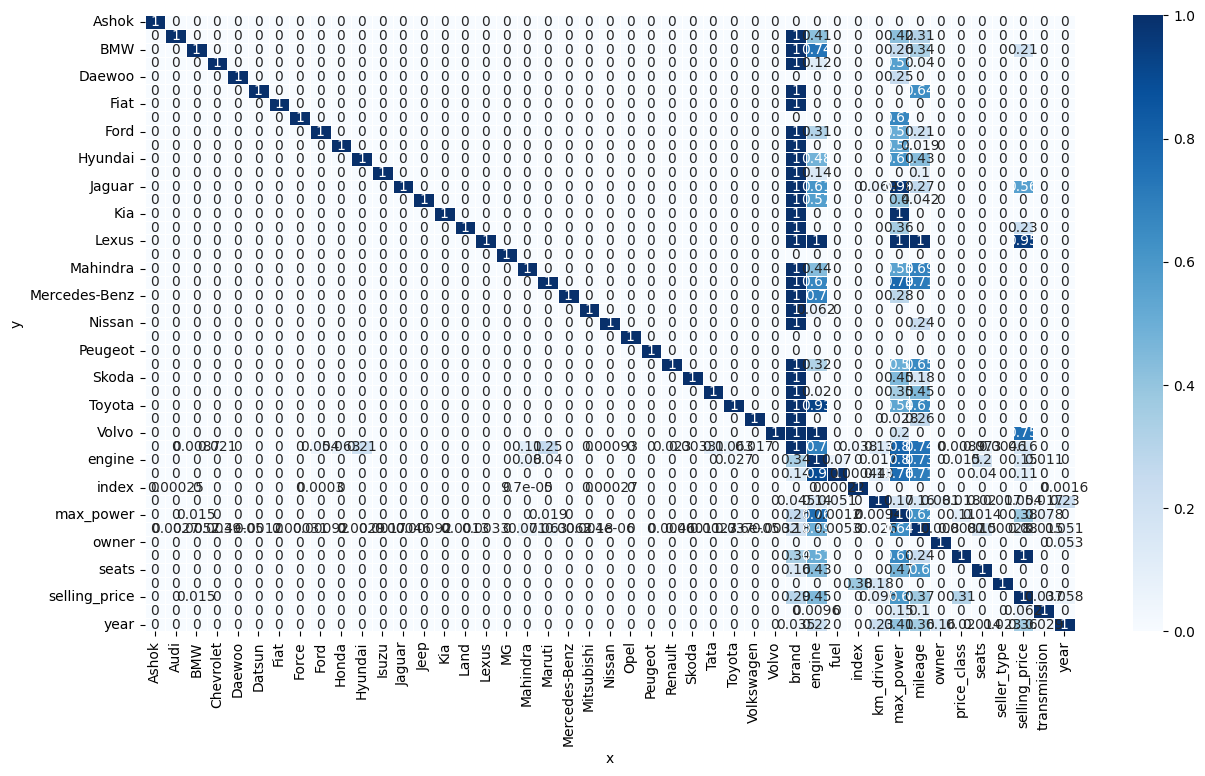

In [618]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
# dfcopy.head(5)

# #this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')


# #plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<Axes: ylabel='selling_price'>

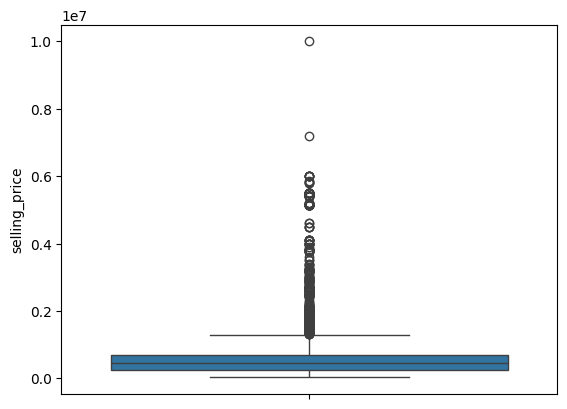

In [619]:
sns.boxplot(df['selling_price'])

## 3. Feature Engineering

I chose 4 Features. 3 Features(year,max_power,mileage) are chosen based on the ppscore and for the brand features, I assume that most of the people predict the car price based on the brand name. 


## 4. Feature selection

In [620]:
brand_detect = list(brand_ohe.categories_[0][1:])
features = ['max_power','mileage','year'] + brand_detect

In [621]:
features

['max_power',
 'mileage',
 'year',
 'Ashok',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [622]:
df.columns

Index(['index', 'brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'price_class', 'Ashok', 'Audi', 'BMW',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [623]:
X = df[features]
# y = np.log(df["selling_price"])

y = df["selling_price"]
print(y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8023    320000
8024    135000
8025    382000
8026    290000
8027    290000
Name: selling_price, Length: 8028, dtype: int64


In [624]:
y_cut ,c= pd.cut(y, bins=4, labels=[0,1,2,3],retbins=True)
y_cut

0       0
1       0
2       0
3       0
4       0
       ..
8023    0
8024    0
8025    0
8026    0
8027    0
Name: selling_price, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [625]:
c

array([   20028.999,  2522499.25 ,  5014999.5  ,  7507499.75 ,
       10000000.   ])

In [626]:
y_binned,classes  = pd.qcut(y,4,labels=[0,1,2,3],retbins=True) #Divides data into bins with an equal number of data points in each bin (quantiles)
y_binned

0       1
1       1
2       0
3       0
4       0
       ..
8023    1
8024    0
8025    1
8026    1
8027    1
Name: selling_price, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [627]:
classes

array([   29999.,   260000.,   450000.,   680000., 10000000.])

### Train test split

In [628]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size = 0.3, random_state = 32)

## 5. Preprocessing

### Null values

In [629]:
#check for null values
X_train[features].isna().sum()

max_power        152
mileage          155
year               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [630]:
X_test[features].isna().sum()

max_power        56
mileage          59
year              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [631]:
y_train.isna().sum()

np.int64(0)

In [632]:
y_test.isna().sum()

np.int64(0)

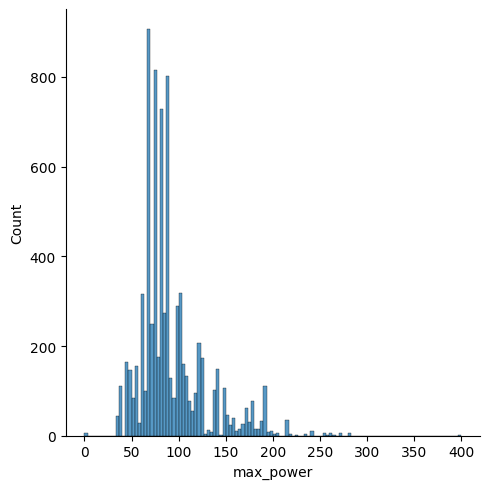

In [633]:
sns.displot(data=df, x='max_power')

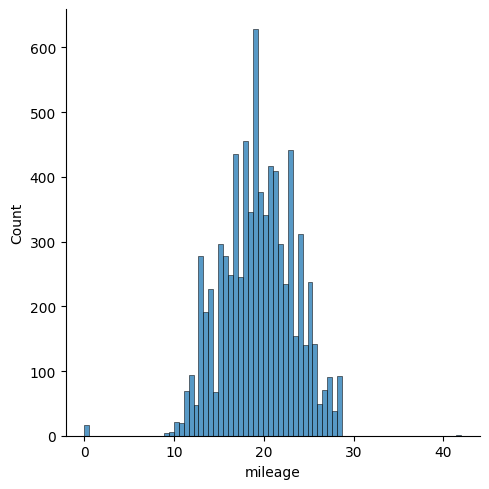

In [634]:
sns.displot(data=df, x='mileage')

In [635]:
#X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['year'].fillna(X_train['year'].mean(), inplace=True)

In [636]:
#X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['year'].fillna(X_train['year'].mean(), inplace=True)

In [637]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()
year_default = X_train['year'].mean()

In [638]:
#check again
X_train[features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [639]:
X_test[features].isna().sum()

max_power        0
mileage          0
year             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [640]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

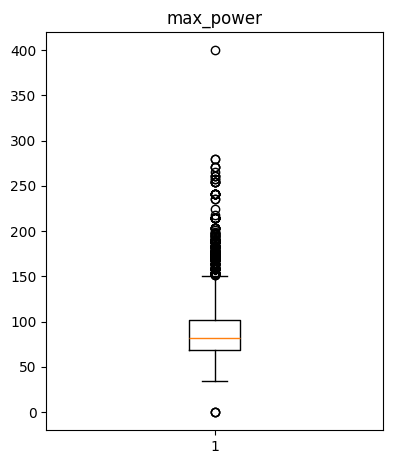

In [641]:
# Create a dictionary of columns.
#col_dict = {'engine':1,'max_power':2,'mileage':3}
col_dict = {'max_power':1}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [642]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [643]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    outlier_count(col)



---------------max_power---------------

Number of outliers: 395
Percent of data that is outlier: 7.03%

---------------mileage---------------

Number of outliers: 17
Percent of data that is outlier: 0.3%

---------------year---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------Audi---------------

Number of outliers: 32
Percent of data that is outlier: 0.57%

---------------BMW---------------

Number of outliers: 82
Percent of data that is outlier: 1.46%

---------------Chevrolet---------------

Number of outliers: 159
Percent of data that is outlier: 2.83%

---------------Daewoo---------------

Number of outliers: 2
Percent of data that is outlier: 0.04%

---------------Datsun---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------Fiat---------------

Number of outliers: 32
Percent of data that is outlier: 0.57%

---------------Force---------------

Number of outliers: 5
Percent of data that is outlier: 

### Scaling

In [644]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scale_features = ['max_power','mileage','year']
X_train[num_scale_features] = scaler.fit_transform(X_train[num_scale_features])
X_test[num_scale_features]  = scaler.transform(X_test[num_scale_features])

In [645]:
X_train

,max_power,mileage,year,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
6713,-0.642479,-0.065265,-0.955836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2441,-1.560897,-0.827955,-2.964379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6993,-0.076217,-0.654500,-0.202633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2502,-0.698158,1.082595,0.048435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3544,0.217676,1.136162,1.052707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.999193,0.082681,0.801639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2940,0.763848,-0.598383,-1.206904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,-0.269372,-0.113731,0.299503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579,1.793050,-0.445335,1.052707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [646]:
X_test

,max_power,mileage,year,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
560,-0.189010,0.858125,1.052707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3818,-0.843383,-0.343303,-0.955836,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4024,-0.269372,-0.062715,0.299503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6545,0.494063,0.455098,1.052707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3473,-1.618298,0.090334,-1.457972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,-0.498977,1.034130,-0.202633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7649,0.304639,-1.669719,-0.704768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5884,-1.560897,-0.827955,-3.466514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3100,-0.698445,1.082595,1.052707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [647]:
y_train

6713    0
2441    0
6993    1
2502    2
3544    3
       ..
4030    3
2940    1
1334    2
1579    3
2775    0
Name: selling_price, Length: 5619, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [648]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 34)
Shape of X_test:  (2409, 34)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Intercept

In [649]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)

intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [650]:
type(X_train)

numpy.ndarray

In [651]:
X_train.shape

(5619, 35)

In [652]:
y_train.shape

(5619,)

# Change our target to one hot

In [653]:
k = len(np.unique(y_binned))
print(k)
m = X_train.shape[0]
print(m)
n = X_train.shape[1]

Y_train_encoded = np.zeros((m,k))

print(Y_train_encoded)
Y_train_encoded.shape

# for each_class in range(k):
#     cond = y_binned == each_class
#     Y_train_encoded[np.where(cond),each_class]=1

# print(Y_train_encoded)

4
5619
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


(5619, 4)

In [654]:
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond),each_class] =1

print(Y_train_encoded)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [655]:
type(Y_train_encoded)

numpy.ndarray

## ML Flow

In [656]:
#track experiment
import mlflow
import os
import mlflow.sklearn

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ['LOGNAME']="st124196_SAS"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
mlflow.set_experiment(experiment_name="st124196-a3")


<Experiment: artifact_location='mlflow-artifacts:/634818145723205682', creation_time=1744067679044, experiment_id='634818145723205682', last_update_time=1744067679044, lifecycle_stage='active', name='st124196-a3', tags={}>

In [657]:
from sklearn.preprocessing import PolynomialFeatures

## 6. Modeling

In [658]:
import time
from sklearn.model_selection import KFold

In [659]:
X_train.shape

(5619, 35)

In [660]:
X_train

array([[ 1.        , -0.64247931, -0.0652653 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.56089721, -0.82795478, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.07621727, -0.65450032, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.26937204, -0.11373052, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.79305016, -0.44533464, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.09307809,  1.48562166, ...,  0.        ,
         0.        ,  0.        ]])

In [661]:
type(X_train)

numpy.ndarray

In [662]:
X_test.shape

(2409, 35)

In [663]:
X_test

array([[ 1.        , -0.18901047,  0.85812463, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.84338323, -0.34330261, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.26937204, -0.0627145 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -1.56089721, -0.82795478, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.6984454 ,  1.08259511, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -1.09307809,  1.48562166, ...,  0.        ,
         0.        ,  0.        ]])

In [664]:
Y_train_encoded.shape

(5619, 4)

In [665]:
Y_train_encoded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [666]:
weights = (y_train).value_counts(normalize=True).sort_index()

In [667]:
weights

selling_price
0    0.254138
1    0.261256
2    0.237231
3    0.247375
Name: proportion, dtype: float64

In [668]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from math import sqrt, isnan

In [669]:
class LogisticRegression:
    
    
    def __init__(self, k,n, method, init_theta, momentum, alpha, max_iter):
        self.k = k
        self.n = n
        self.cv = KFold(n_splits=5)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.init_theta = init_theta
        self.momentum = momentum
        self.prev_step = 0
             
    
    def fit(self, X_train, y_train):

        # Metrics for model performance
        
        self.kfold_accuracy = []
        self.kfold_w_precision=[]
        self.kfold_w_recall=[]
        self.kfold_f1 = []

        # To save the loss 
        self.losses = []

        self.n = X_train.shape[1]

        start_time = time.time()
        
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):

            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # reset the prev_step for each fold.
            self.prev_step = 0
            
            # initialize theta
            if self.init_theta == 'zero':
                self.W = np.zeros((self.n, self.k))
            else:
                m = X_cross_train.shape[1]
                sqrt_m = sqrt(m)
                lower, upper = -(1 / sqrt_m), (1 / sqrt_m)
                numbers = np.random.uniform(lower, upper, size = (self.n, self.k))
                scaled = lower + numbers * (upper - lower)
                self.W = scaled

            perm = np.random.permutation(X_cross_train.shape[0])
            X_cross_train = X_cross_train[perm]
            y_cross_train = y_cross_train[perm]
            
            # method starts here!!! (batch, minibatch,sto)
            if self.method == "batch":
                
                for i in range(self.max_iter):
                    loss, _ =  self.gradient(X_cross_train, y_cross_train)
                    self.losses.append(loss)
                
            elif self.method == "minibatch":
                
                batch_size = int(0.3 * X.shape[0])
                for i in range(self.max_iter):
                    ix = np.random.randint(0, X_cross_train.shape[0]) 
                    batch_X = X_cross_train[ix:ix+batch_size]
                    batch_Y = y_cross_train[ix:ix+batch_size]
                    loss, _= self.gradient(batch_X, batch_Y)
                    self.losses.append(loss)
                   
            elif self.method == "sto":
                list_of_used_ix = [] # without replacement

                for i in range(self.max_iter):
                    idx = np.random.randint(X_cross_train.shape[0])
                    while i in list_of_used_ix:
                        idx = np.random.randint(X_cross_train.shape[0])

                    sto_x = X_cross_train[idx, :].reshape(1, -1)
                    sto_y = y_cross_train[idx]
                    loss,_ = self.gradient(sto_x, sto_y)
                    
                    list_of_used_ix.append(i)
                    if len(list_of_used_ix) == X.shape[0]:
                        list_of_used_ix = []
                    self.losses.append(loss)

            else:
                raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
            

            # Predicted y value from Cross validation set
            y_hat_val = self.predict(X_cross_val)

            # Y_train_encoded --> y_cross_val 
            y_true_val = self.decode_y(y_cross_val)

            self.precision(y_true_val,y_hat_val)
            self.recall(y_true_val,y_hat_val)

            # Metrics for model performance
            
            val_w_f1 = self.weighted_f1_score()
            val_accuracy = self.accuracy(y_true_val, y_hat_val)
            val_w_precision = self.weighted_precision(y_true_val,y_hat_val)
            val_w_recall = self.weighted_recall(y_true_val,y_hat_val)

            # self.kfold_losses.append(val_loss)
            self.kfold_accuracy.append(val_accuracy)
            self.kfold_w_precision.append(val_w_precision)
            self.kfold_w_recall.append(val_w_recall)
            self.kfold_f1.append(val_w_f1)
        
        print(f"Time taken: {time.time() - start_time}")
        
        
    
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        if self.regularization:
            grad+=self.regularization.derivation(self.W)
        self.update(grad)
        return loss, grad
    
    def update(self,grad):
        step = self.alpha *grad
        self.W = self.W - step + self.momentum * self.prev_step
        self.prev_step = step
        return
    
    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    #Decode the Y_train_encoded(m,k) into (m,)
    def decode_y(self,y_true):
        return np.argmax(y_true, axis =1)
    


    # For Classification Matrix scartch
    def accuracy(self,y_true,y_hat):
        correct_predictions = (y_true == y_hat).sum()
        all_predictions = len(y_hat)
        return correct_predictions / all_predictions 
    
    def support(self,y_true):
        self.supports = np.zeros(self.k)
        for each_class in range(self.k):
            self.supports[each_class] = np.sum(y_true == each_class)
        return self.supports

    
    def precision(self,y_true, y_hat):
    
        self.precisions = np.zeros(self.k)
        for each_class in range(self.k):
            
            TP = np.sum((y_true == each_class) & (y_hat == each_class)) #True Positive (ytrue = True, prediceted value =True)
            FP = np.sum((y_true != each_class) & (y_hat == each_class)) #False Positive (ytrue = False, prediceted value =True)
            
            self.precisions[each_class] = TP / (TP + FP) if (TP + FP) > 0 else 0

        return self.precisions
    
    def macro_precision(self):

        precisions = self.precisions
        self.macro_precisions = np.mean(precisions)

        return self.macro_precisions
    
    def weighted_precision(self,y_true,y_hat):

        precisions = self.precision(y_true,y_hat)
        weights = (y_train).value_counts(normalize=True).sort_index()
        
        return np.sum(weights * precisions)

    
    def recall(self, y_true, y_hat):
        self.recalls = np.zeros(self.k)
        # y_hat_decoded = self.decode_y(y_hat)
        # y_true_encoded = self.encode_y(y_true)

    #     for each_class in range(k):
    #       cond = y_train==each_class
    #       Y_train_encoded[np.where(cond), each_class] = 1

        for each_class in range(self.k):
            
            TP = np.sum((y_true == each_class) & (y_hat == each_class))## True Positive 
            # print(TP.append(TP))
            FN = np.sum((y_true == each_class) & (y_hat != each_class))
            self.recalls[each_class] = TP / (TP + FN) if (TP + FN) > 0 else 0

        return self.recalls

    
    def macro_recall(self):

        recalls = self.recalls
        self.macro_recall = np.mean(recalls)

        return self.macro_recall
    
    def weighted_recall(self,y_true,y_hat):

        recalls = self.recall(y_true,y_hat)
        weights = (y_train).value_counts(normalize=True).sort_index()
        
        return np.sum(weights * recalls)
    
    def f1_score(self):

        precisions = self.precisions
        recalls = self.recalls

        self.f1_scores = np.zeros(self.k)
        for each_class in range(self.k):
            self.f1_scores[each_class] = (2 * (precisions[each_class])* (recalls[each_class]))/((precisions[each_class])+(recalls[each_class]))

        return self.f1_scores

    def macro_f1_score(self):

        f1s= self.f1_scores
        self.macro_f1 = np.mean(f1s)

        return self.macro_f1
    
    def weighted_f1_score(self):

        f1_score = self.f1_score()
        weights = (y_train).value_counts(normalize=True).sort_index()
        
        return np.sum(weights * f1_score)
    
 
    def classification_report_scartch(self,y_test,y_hat):

        total = y_test.shape[0]

        precision = self.precision(y_test,y_hat).round(2)
        macro_precision = self.macro_precision().round(2)
        weighted_precision = self.weighted_precision(y_test,y_hat).round(2)

        recall = self.recall(y_test,y_hat).round(2)
        macro_recall = self.macro_recall().round(2)
        weighted_recall = self.weighted_recall(y_test,y_hat).round(2)

        f1_score = self.f1_score().round(2)
        macro_f1 = self.macro_f1_score().round(2)
        weighted_f1 = self.weighted_f1_score().round(2)

        accuracy = self.accuracy(y_test,y_hat).round(2)
        support = self.support(y_test)

        print('='*6,'classification_report_scartch','='*6)
        print('Report\t\t','precision\t','recall\t','f1 score\t','support\t')

        for each_class in range(self.k):
            print('\t',each_class,'\t',precision[each_class],'\t\t',recall[each_class],'\t\t',f1_score[each_class],'\t\t',int(support[each_class]))
        
        print('\naccuracy\t\t\t\t\t',accuracy,'\t\t',total)
        print('macro_avg\t',macro_precision,'\t\t',macro_recall,'\t\t',macro_f1,'\t\t',total)
        print('weighted_avg\t',weighted_precision,'\t\t',weighted_recall,'\t\t',weighted_f1,'\t\t',total)
        
    # To measure the model performance
    # def kfold_avg_loss(self):
    #     return np.sum(np.array(self.kfold_losses))/len(self.kfold_losses)
    
    def kfold_avg_accuracy(self):
        return np.sum(np.array(self.kfold_accuracy)) / len(self.kfold_accuracy)
    
    def kfold_avg_w_precision(self):
        return np.sum(np.array(self.kfold_w_precision)) / len(self.kfold_w_precision)
    
    def kfold_avg_w_recall(self):
        return np.sum(np.array(self.kfold_w_recall)) / len(self.kfold_w_recall)
    
    def kfold_avg_w_f1(self):
        return np.sum(np.array(self.kfold_f1)) / len(self.kfold_f1)
    

    
      
    

## Regularization

In [670]:
class NoRegularization:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta): # return 0, since we won't have any regularization.
        return 0

class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
        
class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = NoRegularization(l)
        super().__init__(k, n, method, init_theta, momentum,  alpha, max_iter)
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, method, init_theta, momentum, alpha, max_iter)

In [671]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__],classname)

def __init__(self, k, n, method, init_theta,cv=kfold,max_iter=5000)

In [672]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

In [673]:
# import math

# regs = ["Normal", "Ridge"]
# methods = ['sto','batch','minibatch']
# momentums = [0, 0.4]
# init_thetas = ['zero', 'xavier']
# alphas = [0.001, 0.0001]
# poly_degrees = [True,False]
# n = X_train.shape[1]


# for poly_degree in poly_degrees:
#     for reg in regs:
#         for method in methods:
#             for momentum in momentums:
#                 for init_theta in init_thetas:
#                     for alpha in alphas:

#                         params = {"k": k, "n": n,"method": method, "init_theta": init_theta, "momentum": momentum, "alpha": alpha, "max_iter": 5000}
                        
#                         current_run = f"poly_degree-{poly_degree}-reg-{reg}-method-{method}-momemtum{momentum}-theta-{init_theta}-alpha-{alpha}"
#                         # mlflow.start_run(run_name=f"reg-{reg}-momentum-{params['momentum']}-method{params['params']}-init_theta-{params['init_theta']}-alpha-{params[alpha]}",nested=True)
#                         mlflow.start_run(run_name=f"poly_degree-{poly_degree}-reg-{reg}-method-{params['method']}-momentum-{params['momentum']}-init_theta-{params['init_theta']}-alpha-{params['alpha']}", nested=True)

#                         mlflow.log_params(params=params)
#                         print("="*10, reg,"="*10)                    
#                         print(current_run)
                        
#                         type_of_regression = str_to_class(reg)    #Regularization (Normal and Ridge)
#                         model = type_of_regression(**params)

#                         #Polynominal Loop
#                         if poly_degree == True:
#                             poly = PolynomialFeatures(degree=2, include_bias=False)
#                             X_train_poly = poly.fit_transform(X_train)
#                             X_test_poly = poly.transform(X_test)
#                         else:
#                             X_train_poly, X_test_poly = X_train, X_test

#                         model.fit(X_train_poly, Y_train_encoded)
#                         yhat = model.predict(X_train_poly)

                          
#                         # Metrics in ML_flow (Average accuracy, average weighted precision,average weighted recall and average weighted f1 score)
#                         avg_accuracy = model.kfold_avg_accuracy()
#                         print('Average Accuracy:', avg_accuracy )
#                         mlflow.log_metric(key="avg_accuracy",value=avg_accuracy)

#                         avg_precision = model.kfold_avg_w_precision()
#                         print('Average Precision:', avg_precision )
#                         mlflow.log_metric(key="avg_precision",value=avg_precision)  

#                         avg_recall = model.kfold_avg_w_recall()
#                         print('Average Recall:', avg_recall )
#                         mlflow.log_metric(key="avg_recall",value=avg_recall)  
                        
#                         avg_f1 = model.kfold_avg_w_f1()
#                         print('Average f1:', avg_f1)
#                         mlflow.log_metric(key="avg_f1",value=avg_f1)

#                         signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))

#                         mlflow.sklearn.log_model(model,artifact_path='model',signature=signature)

#                         mlflow.end_run()
                    





## Load Model from MLflow

In [674]:
X_train.shape

(5619, 35)

In [675]:
X_test_poly = poly.transform(X_test)

In [676]:
X_test_poly.shape

(2409, 665)

In [677]:
import mlflow.pyfunc
import os

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
model_name = "st124196-a3-model"
model_version = 1

loaded_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

## Testing

In [678]:
X_test_poly.shape

(2409, 665)

In [679]:
y_test.shape

(2409,)

poly_true,model = Normal(1,1,'batch','zero',0,0.01,10)

In [680]:
regs = ['Ridge']
methods = ['batch']
n = X_train.shape[1]
init_theta_ = ['xaiver']
momentums = [0]
alphas = [0.001]

for reg in regs:
    for method in methods:
        for init_theta in init_theta_:
            for momentum in momentums:
                for alpha in alphas:
                    params = {"k": k, "n": n,"method": method, "init_theta": init_theta, "momentum": momentum, "alpha": alpha, "max_iter": 5000}
                    current_run = f"reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-alpha-{alpha}"
                    type_of_regression = str_to_class(reg)
                    model_ = type_of_regression(**params)
                    y_hat_my_model = model_.fit(X_train_poly,Y_train_encoded)
                    y_hat = loaded_model.predict(X_test_poly)
    
print(y_hat.shape)

print(model_.classification_report_scartch(y_test,y_hat))  
print()
print("========Classification report=======")
print("Report: ", classification_report(y_test, y_hat))

Time taken: 161.3181300163269
(2409,)
====== classification_report_scartch ======
Report		 precision	 recall	 f1 score	 support	
	 0 	 0.86 		 0.85 		 0.85 		 622
	 1 	 0.65 		 0.7 		 0.67 		 576
	 2 	 0.69 		 0.64 		 0.66 		 610
	 3 	 0.83 		 0.85 		 0.84 		 601

accuracy					 0.76 		 2409
macro_avg	 0.76 		 0.76 		 0.76 		 2409
weighted_avg	 0.76 		 0.76 		 0.76 		 2409
None

========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.86      0.85      0.85       622
           1       0.65      0.70      0.67       576
           2       0.69      0.64      0.66       610
           3       0.83      0.85      0.84       601

    accuracy                           0.76      2409
   macro avg       0.76      0.76      0.76      2409
weighted avg       0.76      0.76      0.76      2409



In [681]:
y_hat.shape

(2409,)

### Saving the model
To provide inference service or deploy, it's best to save the model for latter use.

In [682]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997])

In [683]:
classes

array([   29999.,   260000.,   450000.,   680000., 10000000.])

In [684]:
price_range = {
    0: f'{classes[0]} - {classes[1]}',
    1: f'{classes[1]} - {classes[2]}',
    2: f'{classes[2]} - {classes[3]}',
    3: f'{classes[3]} - {classes[4]}'
}

# Inference

In [685]:
import pickle
model = {
    'scaler': scaler,
    'year_default' : 2017,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
    'classes' : price_range,
    'poly' : poly,
    'years': df['year'].unique()
}

# save the model to disk
filename = './app/code/model/car_price_predicition_a3.model'
pickle.dump(model, open(filename, 'wb'))

In [686]:
mileage_default

np.float64(19.345862005856514)

In [687]:
max_power_default

np.float64(82.4)

In [688]:
sample = df [['year','max_power','mileage']].loc[200]
sample

year         2017.00
max_power      83.14
mileage        20.85
Name: 200, dtype: float64

In [689]:
df['selling_price'].loc[2000]

np.int64(300000)

In [690]:

year = 2017
max_power = 83.14
mileage = 20.

input_np = np.array([[year,max_power,mileage]+encoded_brand])
    
#Scaling the input
input_np[:, 0:3] = scaler.transform(input_np[:, 0:3])
input_np = np.insert(input_np, 0, 1, axis=1)


#Transforming the scale result to the original value
# print(f"SHAPE : {input_np}")
input = poly.transform(input_np)
predicted_result = loaded_model.predict(input.astype(float))
print(str(price_range[int(predicted_result[0])]))

29999.0 - 260000.0


# **Assignment Report**